# 2. Exercise solutions

# Exericse 1

*No solution.*

# Exercise 2

In [1]:
import numpy as np


def extract_interval(x, x_bounds):
    '''
    Return the indices of `x` that are within `x_bounds` with both values 
    `x_bounds` being inclusive.
    
    Parameters
    ----------
    x : 1D numpy array
        x-coordinates sorted in ascending order.
    x_bounds : tuple
        A two-element tuple defining the interval within which to extract x-indices.
        
    Returns
    -------
    numpy 1D array
        Array of indices for `x`-values that reside within `x_bounds`.
'''

    # Create boolean array with values indicating if each element is in interval
    a_bool = (x >= x_bounds[0]) & (x <= x_bounds[1])
    
    # Extract indices where condition is True into array
    idx = np.where(a_bool)
    
    # Take first element since this is only 1D and return
    return idx[0]

In [2]:
# Basic tests
x1 = np.arange(0, 10)
idx1 = extract_interval(x=x1, x_bounds=(3, 7))
print(f'x1 = {x1}')
print(f'idx1 = {idx1}')

x2 = np.arange(-0.6, 3.8, 0.4)
idx2 = extract_interval(x=x2, x_bounds=(-0.3, 1.5))
print('\n')
print(f'x2 = {x2}')
print(f'idx2 = {idx2}')

x1 = [0 1 2 3 4 5 6 7 8 9]
idx1 = [3 4 5 6 7]


x2 = [-0.6 -0.2  0.2  0.6  1.   1.4  1.8  2.2  2.6  3.   3.4]
idx2 = [1 2 3 4 5]


# Exercise 3

In [3]:
def extrema_indices(y):
    ''' Return indices of all local extrema in `y`. 
    
    Parameters
    ----------
    y : 1D numpy array
        Array of values to search for local extrema.
        
    Returns
    -------
    1D numpy array
        Array of indices for local extrema.
    
    '''
    # Find local maxima
    idx_max, _ = find_peaks(y)
    
    # Find local minima
    idx_min, _ = find_peaks(-y)
    
    # Combine the two index arrays to one array and return it
    return np.append(idx_max, idx_min)

In [4]:
# Test the function

from scipy.signal import find_peaks

xx = np.linspace(1, 20, 40)
yy = np.sin(xx) * 3 * np.cos(xx**2)

idx_extr = extrema_indices(yy)

yy[idx_extr]


array([ 1.83936866,  2.00743698,  1.76511072,  2.68372999, -0.10032392,
        1.99429972,  0.27309389,  2.23407394,  0.12795831,  2.51053515,
        0.2974298 , -2.00646398, -0.63018205, -2.36255017, -2.42571128,
       -0.65672365, -0.37642334, -2.60571339, -1.05772914, -1.4625172 ,
       -0.7508744 , -2.34019749, -1.50602509])

### Note

The third-party function `find_peaks` from `scipy.signal` was **not** imported before the function was defined. It is only needed at the time the function is called and the code has to be executed. The `def func_name` only *defined* the code to be executed later.

# Exercise 4

In [5]:
def arrays_todict(x_arr, y_arr):
    ''' 
    Return a dictionary with y-values in string form as keys 
    and x- and y-values as values. 
    
    Parameters
    ----------
    x_arr : 1D numpy array
        Array of x-values
    y_arr : 1D numpy array
        Array of y-values
        
    Returns
    -------
    dict
        Dictionary of the form 
        {'y1': (x1, y1), 'y2': (x2, y2), ..., 'yn': (xn, yn)}
    '''
    return {f'{y:.2f}': (x, y) for x, y in zip(x_arr, y_arr)}

# Basic test run         
extreme_dict = arrays_todict(xx[idx_extr], yy[idx_extr])
print(extreme_dict)


{'1.84': (2.4615384615384617, 1.8393686554620106), '2.01': (3.923076923076923, 2.007436980439802), '1.77': (5.384615384615384, 1.76511071804143), '2.68': (8.307692307692307, 2.6837299913341677), '-0.10': (9.282051282051281, -0.10032391707156325), '1.99': (10.743589743589743, 1.9942997236478899), '0.27': (12.205128205128204, 0.2730938867590919), '2.23': (14.153846153846153, 2.23407394156468), '0.13': (16.102564102564102, 0.1279583056638538), '2.51': (17.076923076923077, 2.5105351527604087), '0.30': (18.538461538461537, 0.2974298010204702), '-2.01': (1.9743589743589745, -2.0064639778358577), '-0.63': (3.4358974358974357, -0.6301820520525064), '-2.36': (4.410256410256411, -2.3625501688331543), '-2.43': (7.333333333333333, -2.42571128215708), '-0.66': (8.794871794871796, -0.6567236452070268), '-0.38': (9.769230769230768, -0.37642334136110583), '-2.61': (11.23076923076923, -2.60571339261865), '-1.06': (13.179487179487179, -1.0577291429854063), '-1.46': (15.128205128205128, -1.46251720044265

# Exercise 5

In [6]:
def annotate_points(points_to_annotate, **kwargs):
    '''
    Annotate points with corresponding text.
    
    Parameters
    ----------
    points_to_annoate : dict
        Dictionary with desired annotation text as keys and the (x, y)-
        coordinates of the annotation as values.
    **kwargs : keyword arguments
        Arguments to be forwarded to the ax.annotate call.    
    '''
    
    # Loop through x- and y-coordiantes of all points
    for text, (xp, yp) in points_to_annotate.items():

        # Annotate point
        ax.annotate(s=text, xy=(xp, yp), **kwargs)

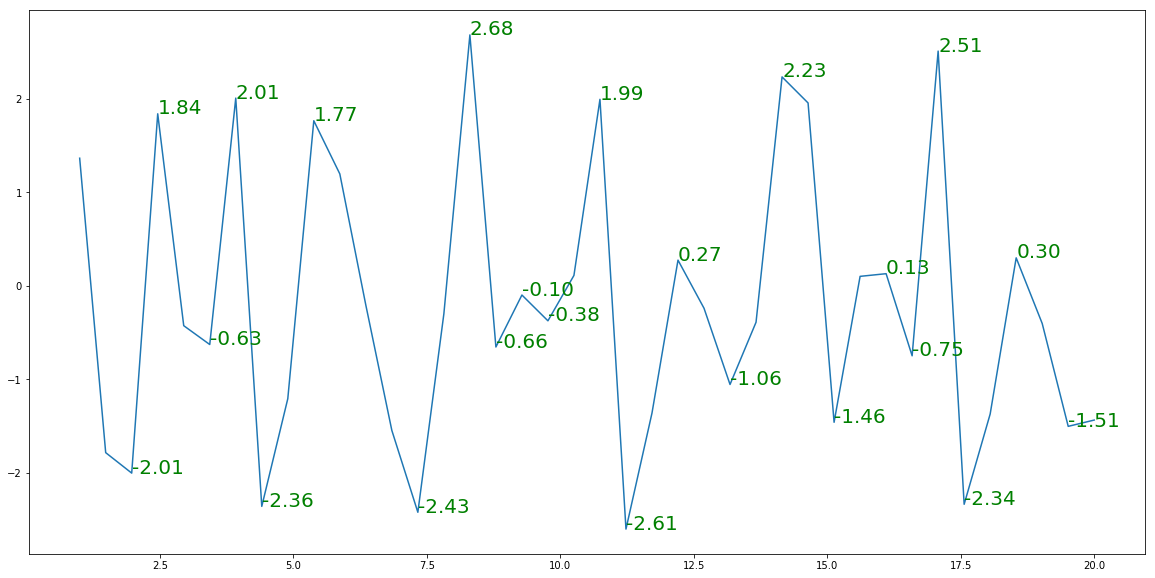

In [8]:
# Testing if it works

import matplotlib.pyplot as plt

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(20,10))

# Plot line graph
ax.plot(xx, yy)

# Annotate peaks
annotate_points(extreme_dict, color='green', size=20)

plt.show()

### Note

The object oriented API for Matplotlib was used for this plot. It might as well have been done by the simpler but less flexible `plt` API, which resembles Matlab's syntax. Here the commands would be

---
```python
# Plot line graph
plt.plot(xx, yy)

# Loop through x- and y-coordiantes of all peaks
for xp, yp in zip(xx[idx_extr], yy[idx_extr]):
    # Annotate peak
    plt.annotate(s=f'{yp:.2f}', xy=(xp, yp))
```
---

It is not necessary to create a figure object with the simple API, as it's taken care of in the background. It would be needed in case the figure object should be used directly in the code, e.g. for saving to a file.

You might wonder why the simple API was not used for the solution. The answer is that the object oriented API has much more customizability, which is e.g. often seen for subplots where `ax` will be an array of axes representing each subplot. Therefore it's good to get in the habit of working with the axes as objects. Working with objects like this is very common in Python.

See here for more about the two different API's: https://matplotlib.org/3.1.1/api/index.html

# Exercise 6

Solution pending...

# Some improvements

Implementation of the improvements mentioned after the exercise descriptions will come later... 

# End of exercises

*The cell below is for setting the style of this document. It's not part of the exercises.*

In [9]:
# Apply css theme to notebook
from IPython.display import HTML
HTML('<style>{}</style>'.format(open('../css/cowi.css').read()))